# Data Visualization on Exchange Rates

In this project I will show how the euro-dollar rate has changed during the coronavirus pandemic. 

I will be creating 2 graphs in this visualization project. The first graph will show the change of the Euro-Dollar from 2016 to 2022. The second graph will show the daily death rates in the United States, as a result of the coronavirus pandemic.

## Introducing the Dataset
### Euro-Dollar Data

In [39]:
import pandas as pd

euro_dollar_prices = pd.read_csv('HistoricalPrices.csv')
euro_dollar_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716 entries, 0 to 1715
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1716 non-null   object 
 1    Open   1716 non-null   float64
 2    High   1716 non-null   float64
 3    Low    1716 non-null   float64
 4    Close  1716 non-null   float64
dtypes: float64(4), object(1)
memory usage: 67.2+ KB


### Cleaning the Data

In [40]:
euro_dollar_prices.columns = euro_dollar_prices.columns.str.replace(' ', '')
euro_dollar_prices['Close'].head(5)

0    1.0195
1    1.0184
2    1.0247
3    1.0167
4    1.0168
Name: Close, dtype: float64

In [41]:
euro_dollar_prices['Date'] = pd.to_datetime(euro_dollar_prices['Date'])
euro_dollar_prices.sort_values('Date',inplace=True,ignore_index=True)
print(euro_dollar_prices['Date'].head(5))

0   2016-01-11
1   2016-01-12
2   2016-01-13
3   2016-01-14
4   2016-01-15
Name: Date, dtype: datetime64[ns]


In [42]:
print(euro_dollar_prices['Date'].tail(5))

1711   2022-08-02
1712   2022-08-03
1713   2022-08-04
1714   2022-08-05
1715   2022-08-08
Name: Date, dtype: datetime64[ns]


#### Filling In Missing Dates

In [43]:
euro_dollar_prices.loc[euro_dollar_prices['Date'] == '2020-05-02',]

,Date,Open,High,Low,Close


In [44]:
euro_dollar_prices.loc[euro_dollar_prices['Date'] == '2020-05-04',]

,Date,Open,High,Low,Close
1125,2020-05-04,1.1094,1.1094,1.0896,1.0904


In [45]:
euro_dollar_prices[1120:1130]

,Date,Open,High,Low,Close
1120,2020-04-27,1.0820,1.0861,1.0812,1.0830
1121,2020-04-28,1.0829,1.0890,1.0810,1.0820
1122,2020-04-29,1.0819,1.0886,1.0817,1.0874
1123,2020-04-30,1.0876,1.0973,1.0835,1.0954
1124,2020-05-01,1.0953,1.1017,1.0935,1.0980
1125,2020-05-04,1.1094,1.1094,1.0896,1.0904
1126,2020-05-05,1.0906,1.0926,1.0825,1.0837
1127,2020-05-06,1.0838,1.0848,1.0782,1.0795
1128,2020-05-07,1.0796,1.0836,1.0767,1.0835
1129,2020-05-08,1.0833,1.0876,1.0816,1.0837


In [46]:
euro_dollar_prices = euro_dollar_prices.sort_values(by=['Date'], ascending=[True])
euro_dollar_prices.set_index('Date', inplace=True)
euro_dollar_prices = euro_dollar_prices.resample('D').ffill().reset_index()
euro_dollar_prices.loc[:,['Date','Close']]

,Date,Close
0,2016-01-11,1.0860
1,2016-01-12,1.0859
2,2016-01-13,1.0877
3,2016-01-14,1.0866
4,2016-01-15,1.0917
...,...,...
2397,2022-08-04,1.0247
2398,2022-08-05,1.0184
2399,2022-08-06,1.0184
2400,2022-08-07,1.0184


All dates have been filled.

In [47]:
euro_dollar_prices[1565:1580]

,Date,Open,High,Low,Close
1565,2020-04-24,1.0777,1.0830,1.0728,1.0822
1566,2020-04-25,1.0777,1.0830,1.0728,1.0822
1567,2020-04-26,1.0777,1.0830,1.0728,1.0822
1568,2020-04-27,1.0820,1.0861,1.0812,1.0830
1569,2020-04-28,1.0829,1.0890,1.0810,1.0820
1570,2020-04-29,1.0819,1.0886,1.0817,1.0874
1571,2020-04-30,1.0876,1.0973,1.0835,1.0954
1572,2020-05-01,1.0953,1.1017,1.0935,1.0980
1573,2020-05-02,1.0953,1.1017,1.0935,1.0980
1574,2020-05-03,1.0953,1.1017,1.0935,1.0980


### Rolling Mean

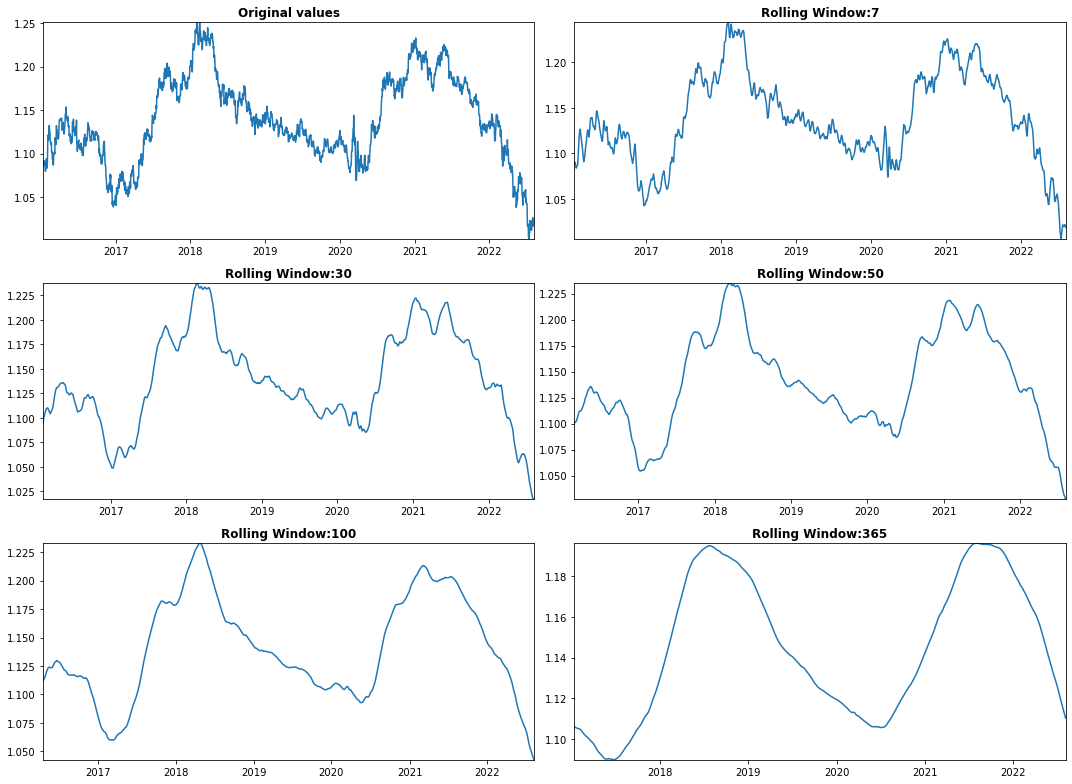

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,11))

plt.subplot(3,2,1)
plt.plot(euro_dollar_prices['Date'], euro_dollar_prices['Close'])
plt.title('Original values', weight='bold')
plt.margins(x=0,y=0)

for i, rolling_mean in zip([2, 3, 4, 5, 6],
                           [7, 30, 50, 100, 365]):
    plt.subplot(3,2,i)
    plt.plot(euro_dollar_prices['Date'],
             euro_dollar_prices['Close'].rolling(rolling_mean).mean())
    plt.title('Rolling Window:' + str(rolling_mean), weight='bold')
    plt.margins(x=0,y=0)
    
plt.tight_layout() # Auto-adjusts the padding between subplots
plt.show()

In [49]:
euro_dollar_prices['Rolling'] = euro_dollar_prices['Close'].rolling(7).mean()
euro_dollar_prices['Rolling'].describe()

count    2396.000000
mean        1.138332
std         0.048593
min         1.006043
25%         1.106239
50%         1.132214
75%         1.177671
max         1.244014
Name: Rolling, dtype: float64

### Covid Data

In [50]:
covid_data = pd.read_csv('owid-covid-data.csv')
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207316 entries, 0 to 207315
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    207316 non-null  object 
 1   continent                                   195332 non-null  object 
 2   location                                    207316 non-null  object 
 3   date                                        207316 non-null  object 
 4   total_cases                                 198929 non-null  float64
 5   new_cases                                   198642 non-null  float64
 6   new_cases_smoothed                          197465 non-null  float64
 7   total_deaths                                180147 non-null  float64
 8   new_deaths                                  180102 non-null  float64
 9   new_deaths_smoothed                         178935 non-null  float64
 

In [51]:
covid_data = covid_data.loc[covid_data['iso_code'] == 'USA',:]

In [52]:
covid_data['date'] = pd.to_datetime(covid_data['date'])
covid_data.sort_values('date', inplace=True,ignore_index=True)

In [53]:
covid_data['date'].tail(5)

925   2022-08-04
926   2022-08-05
927   2022-08-06
928   2022-08-07
929   2022-08-08
Name: date, dtype: datetime64[ns]

### Data on Confirmed COVID-19 Deaths

Due to varying protocols and challenges in the attribution of the cause of death, the number of confirmed deaths may not accurately represent the true number of deaths caused by COVID-19.

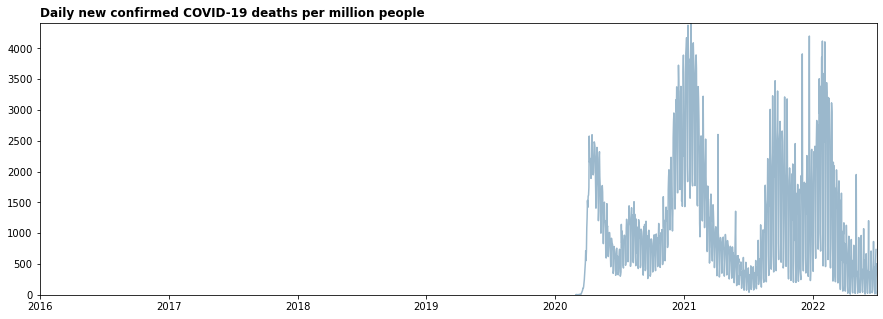

In [54]:
import numpy as np

plt.figure(figsize=(15, 5))
plt.plot(covid_data['date'],
         covid_data['new_deaths'], color='#9bb8cc',
        )
plt.title('Daily new confirmed COVID-19 deaths per million people', weight='bold',loc='left')
plt.xlim([np.datetime64('2016-01-01'), np.datetime64('2022-07-01')])
plt.margins(x=0,y=0)
plt.show()

## Storytelling Data Visualization

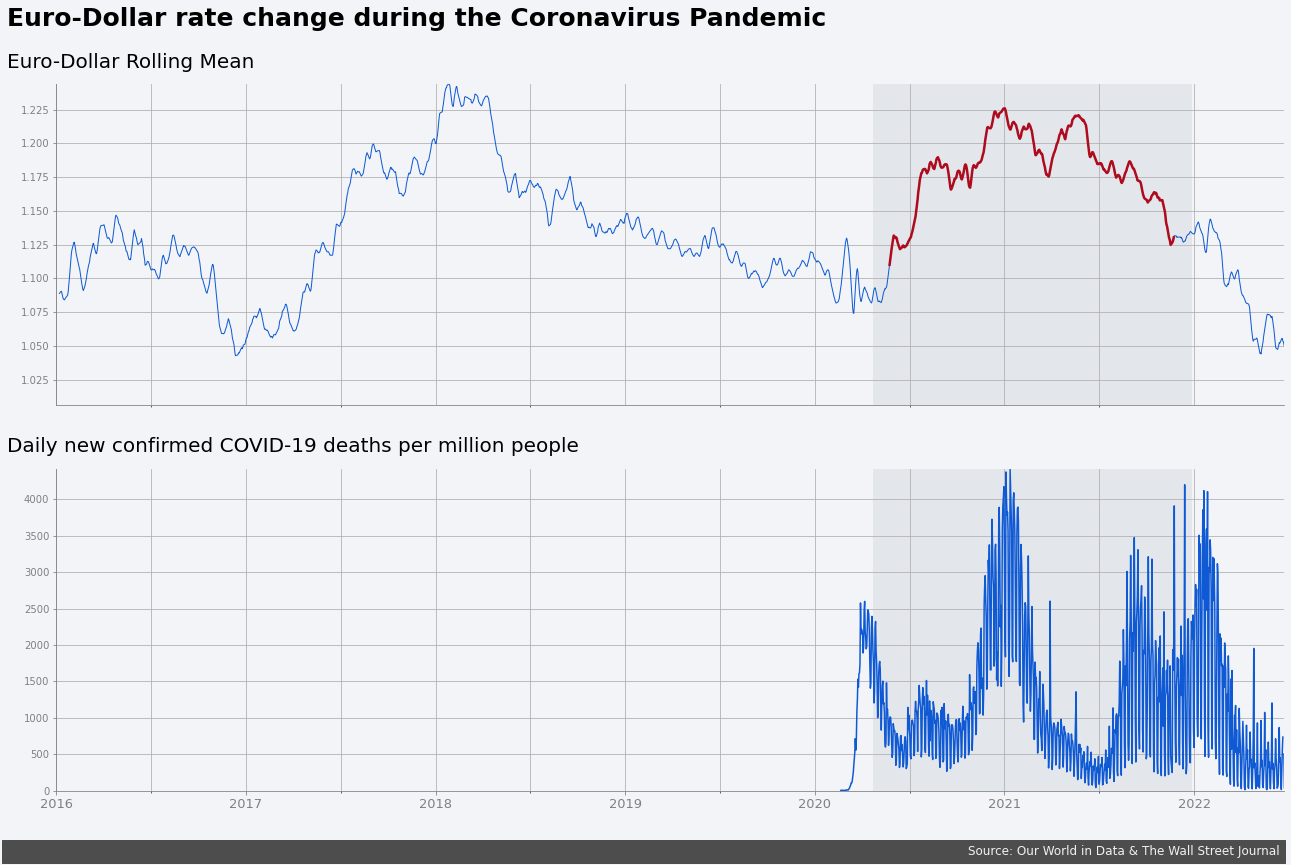

In [59]:
from datetime import timedelta
import matplotlib.ticker as plticker

fig, (ax1, ax2) = plt.subplots(nrows=2,ncols=1,figsize=(22,13),facecolor='#f2f4f7')
ax1.plot(euro_dollar_prices['Date'], euro_dollar_prices['Rolling'], color='#0f5ad4',linewidth=1)
ax2.plot(covid_data['date'], covid_data['new_deaths'], color='#0f5ad4')
ax1.plot(euro_dollar_prices['Date'][1604:2152], euro_dollar_prices['Rolling'][1604:2152],color='#af0b1e', linewidth=2.5)

axes = [ax1, ax2]
major_ticks = np.arange(np.datetime64('2016-01-11'), np.datetime64('2022-07-01'), timedelta(days=365))
minor_ticks = np.arange(np.datetime64('2016-01-11'), np.datetime64('2022-07-01'), timedelta(days=182.5))
for ax in axes:
    ax.spines['bottom'].set_color('gray')
    ax.spines['left'].set_color('gray')
    ax.tick_params(axis='y', colors='gray')
    ax.set_xlim([np.datetime64('2016-01-11'), np.datetime64('2022-07-01')])
    ax.set_xticks(major_ticks)
    ax.set_xticks(minor_ticks,minor=True)
    ax.grid(which='both')
    ax.set_facecolor('#f2f4f7')
    ax.axvspan(np.datetime64('2020-05-02'), np.datetime64('2022-01-06'), facecolor="#bac1cc", alpha=0.25)
    for location in ['right', 'top']:
        ax.spines[location].set_visible(False)

ax1.spines['bottom'].set_visible(True)
ax1.tick_params(bottom=0)
ax1.set_xticklabels([])
ax2.tick_params(axis='x', colors='gray')
ax2.set_xticklabels(['2016','2017','2018', '2019','2020','2021','2022'], size=13)
ax1.margins(x=0,y=0)
ax2.margins(y=0)
loc = plticker.MultipleLocator(base=0.025) # this locator puts ticks at regular intervals
ax1.yaxis.set_major_locator(loc)

plt.text(x=-0.04, y=2.38, s='Euro-Dollar rate change during the Coronavirus Pandemic', weight='bold',size=25, transform=ax.transAxes)
plt.text(x=-0.04, y=2.25, s='Euro-Dollar Rolling Mean', size=20, transform=ax.transAxes)
plt.text(x=-0.04, y=1.055, s='Daily new confirmed COVID-19 deaths per million people', size=20, transform=ax.transAxes)
plt.text(x=-0.04, y=-0.2, s=''+ ' '*248 + 'Source: Our World in Data & The Wall Street Journal', color = '#f0f0f0', backgroundcolor = '#4d4d4d', size=12, transform=ax.transAxes)

plt.show()

